# Regression anatomy theorem
In this notebook we provide an example of how regression anatomy works. Suppose we want to estimate the causal effect of family size in labor supply.
\begin{equation}
    Y_i = \beta_0 + \beta_1 X_i + u_i
\end{equation}
where $Y$ is labor supply and X is family size.

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file):
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master" + file)

auto = pd.read_stata('https://raw.github.com/scunning1975/mixtape/master/auto.dta')



In [6]:
auto.head()

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,length_diff
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic,-1.932432
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic,-14.932432
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic,-19.932432
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic,8.067568
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic,34.067568


In [5]:
auto['length_diff'] = auto['length'] - auto['length'].mean()

In [8]:
modelocorto = sm.OLS.from_formula('price ~ length', \
    data=auto).fit()
modelolargo = sm.OLS.from_formula('price ~ length + weight + headroom + mpg', \
    data=auto).fit()

In [10]:
print(modelocorto.params)
print(modelolargo.params)

Intercept   -4584.899018
length         57.202238
dtype: float64
Intercept    14177.582331
length         -94.496510
weight           4.335045
headroom      -490.966654
mpg            -87.958383
dtype: float64


In [11]:
auto['y_single'] = modelocorto.params[0] + modelocorto.params[1]*auto['length']
auto['y_multi'] = modelolargo.params[0] + modelolargo.params[1]*auto['length']

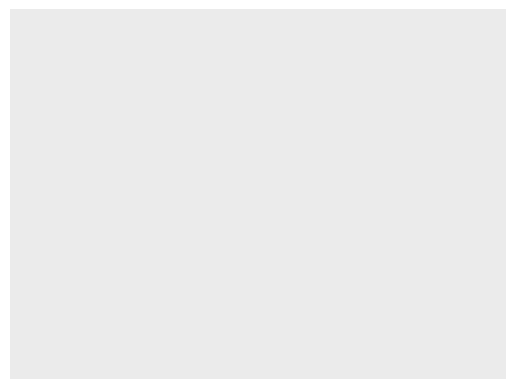

<ggplot: (8794217286057)>

In [28]:
import plotnine as p


p.ggplot(auto)